In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.append("../../scripts")

from model import Model, model_from_file
from norms import *

%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 14})

In [4]:
def model_plot(model, times, **kwargs):
    if 'figsize' in kwargs:
        plt.figure(figsize=kwargs['figsize'], dpi=300)
    else:
        plt.figure(dpi=300)
    if 'title' in kwargs:
        plt.title(kwargs['title'])
    if 'xlim' in kwargs:
        plt.xlim(kwargs['xlim'])
    if 'ylim' in kwargs:
        plt.ylim(kwargs['ylim'])
    plt.xlabel('$x$')
    plt.ylabel(r'$\phi$')
    t_indices = [model.t_index(t) for t in times]
    for i in t_indices:
        plt.plot(model.xs, model.phi[i])
    plt.legend(['$t = {:.3e}$'.format(model.ts[i]) for i in t_indices],
        bbox_to_anchor=(0.69, 0.7), loc="upper left")
    plt.show()

In [5]:
models_dir = 'data_birth/'

In [6]:
model = model_from_file(models_dir + 'model.csv')

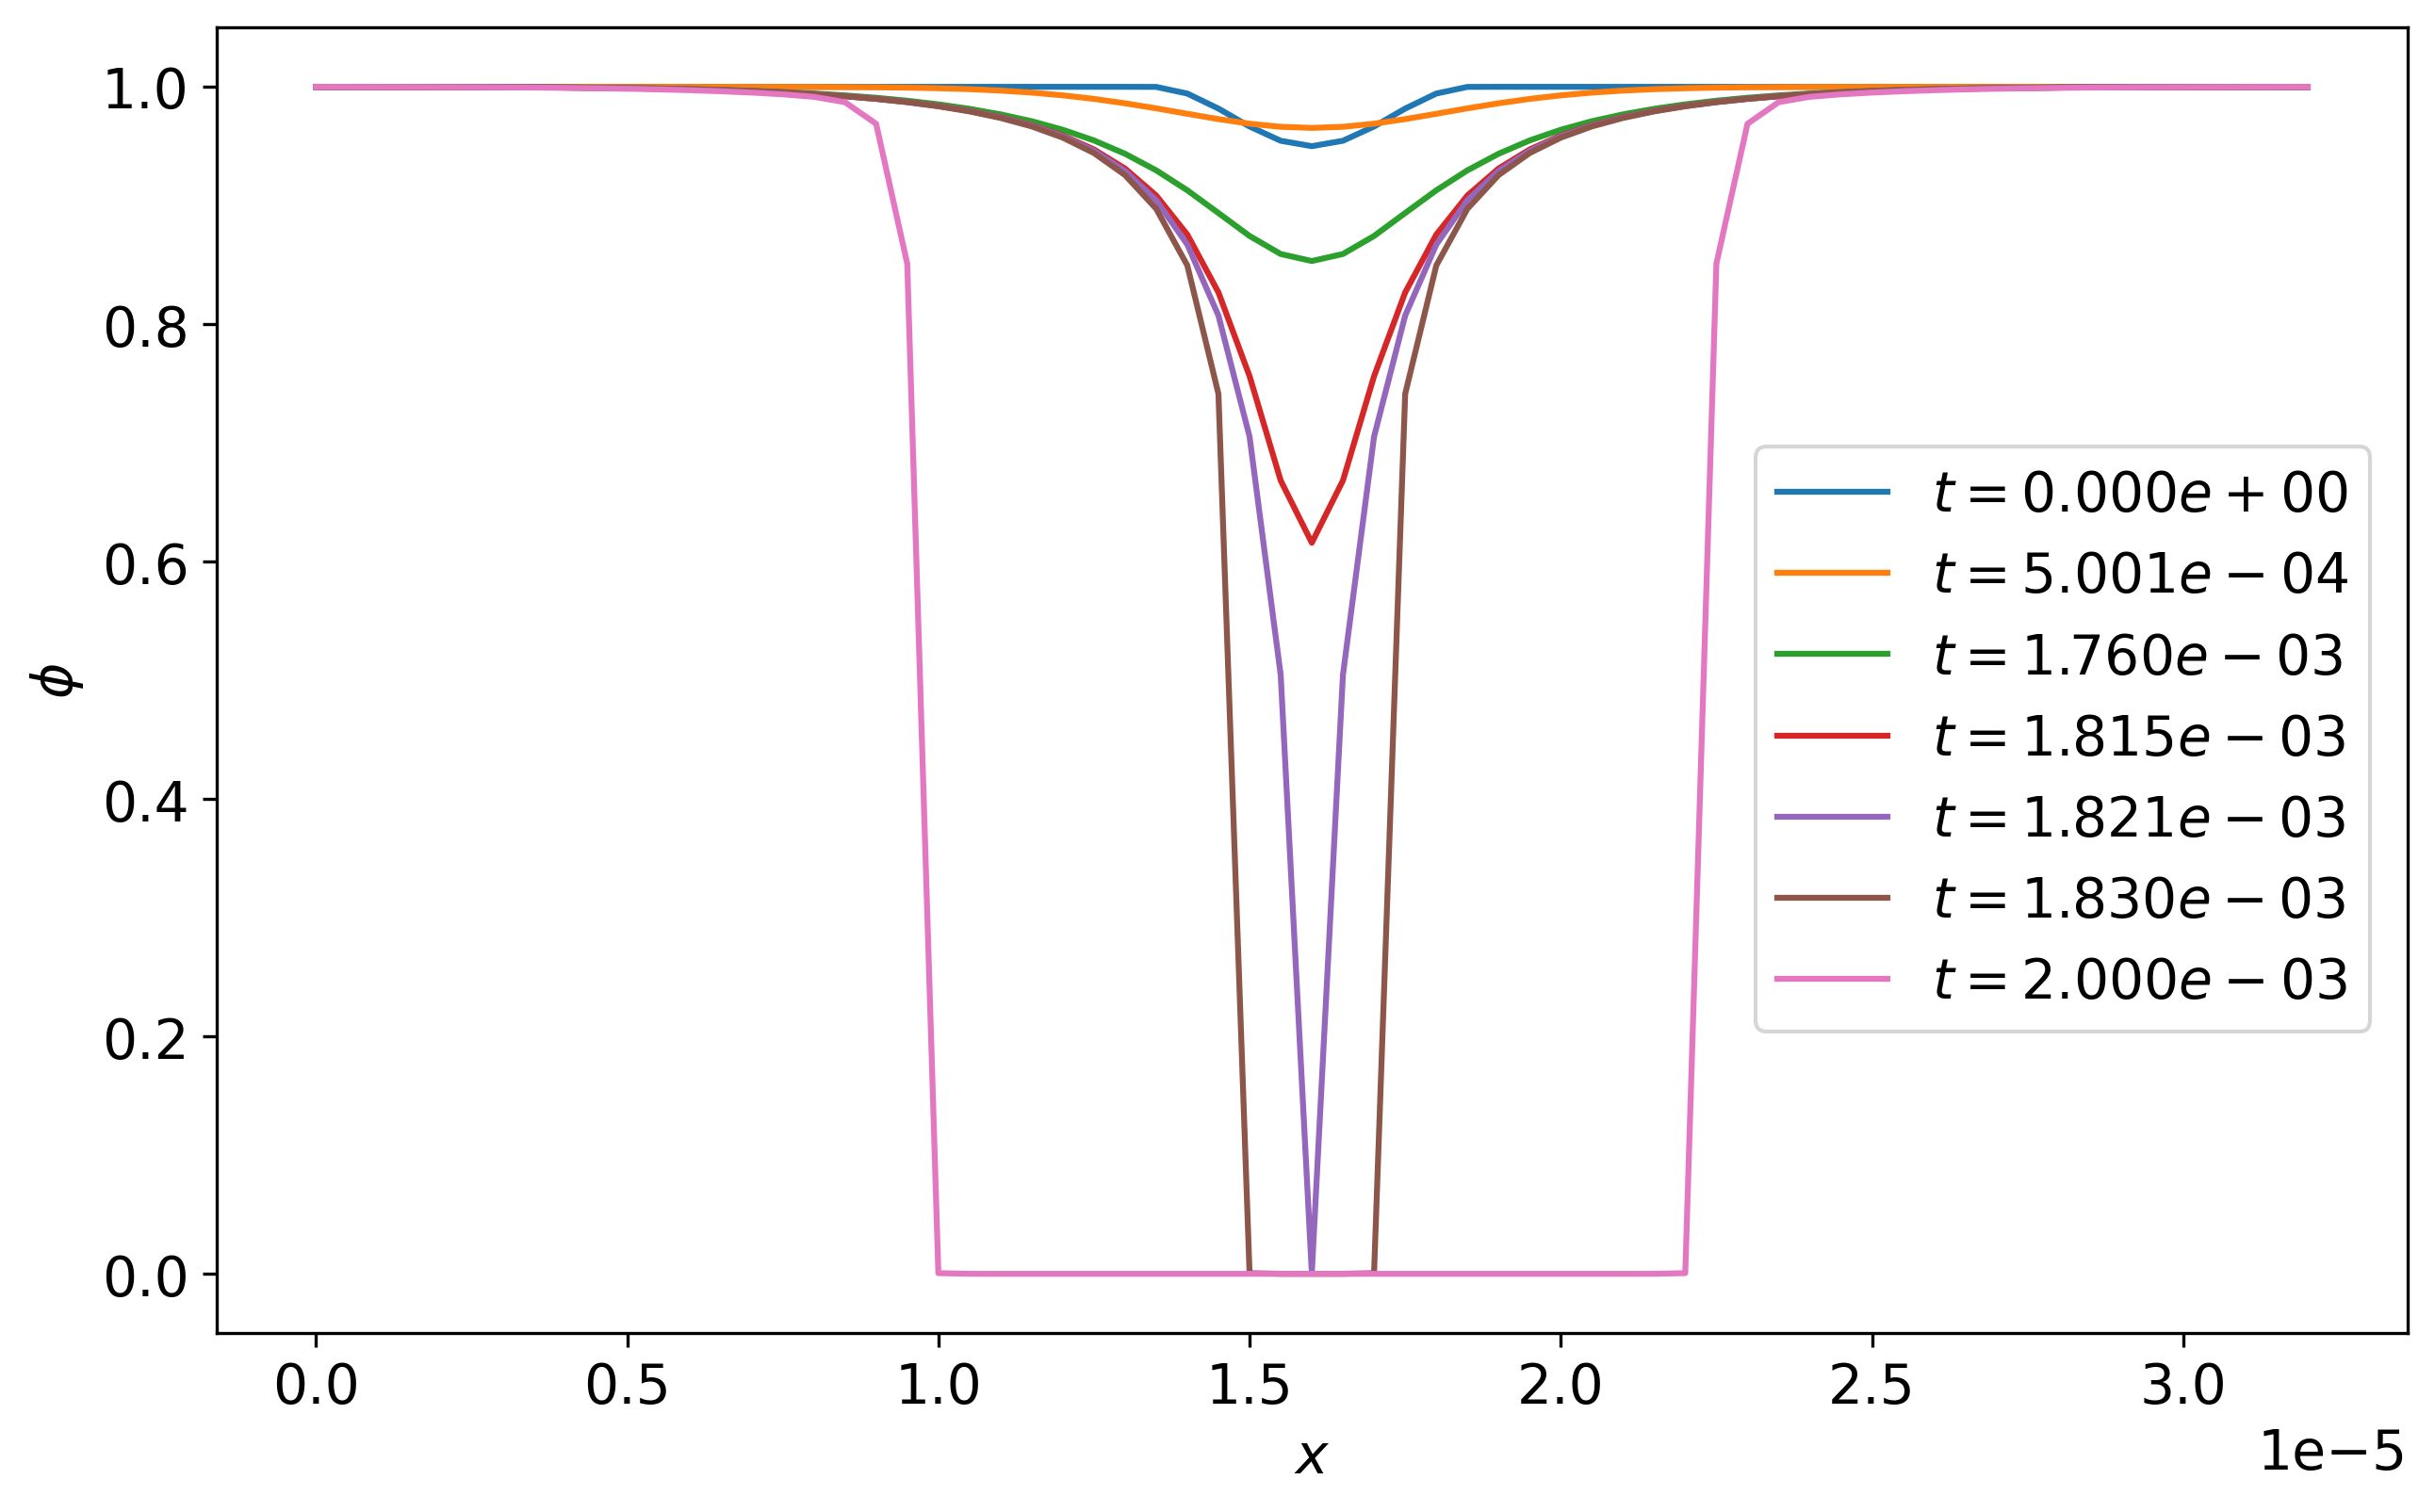

In [7]:
ts = [0, 5.001e-4, 1.76e-3, 1.815e-3, 1.821e-3, 1.83e-3, 2e-3]
model_plot(model, ts, figsize=(10, 6))

In [8]:
model_ad_phi = model_from_file(models_dir + 'model_ad_phi.csv')
model_ad_energy = model_from_file(models_dir + 'model_ad_energy.csv')
model_ad_stability = model_from_file(models_dir + 'model_ad_stability.csv')

In [9]:
metric_ad_phi, t_shift_ad_phi = \
    metric_shifted(model_ad_phi.df_phi, model_ad_phi.ts, model.df_phi, model.ts)

In [10]:
metric_ad_energy, t_shift_ad_energy = \
    metric_shifted(model_ad_energy.df_phi, model_ad_energy.ts, model.df_phi, model.ts)

In [11]:
metric_ad_stability, t_shift_ad_stability = \
    metric_shifted(model_ad_stability.df_phi, model_ad_stability.ts, model.df_phi, model.ts)

In [12]:
def window_min(values, k):
    return np.array([
        values[max(i - k, 0):min(i + k + 1, len(values))].min() for i in range(len(values))
    ])

def window_max(values, k):
    return np.array([
        values[max(i - k, 0):min(i + k + 1, len(values))].max() for i in range(len(values))
    ])

def window_mean(values, k):
    return np.array([
        values[max(i - k, 0):min(i + k + 1, len(values))].mean() for i in range(len(values))
    ])

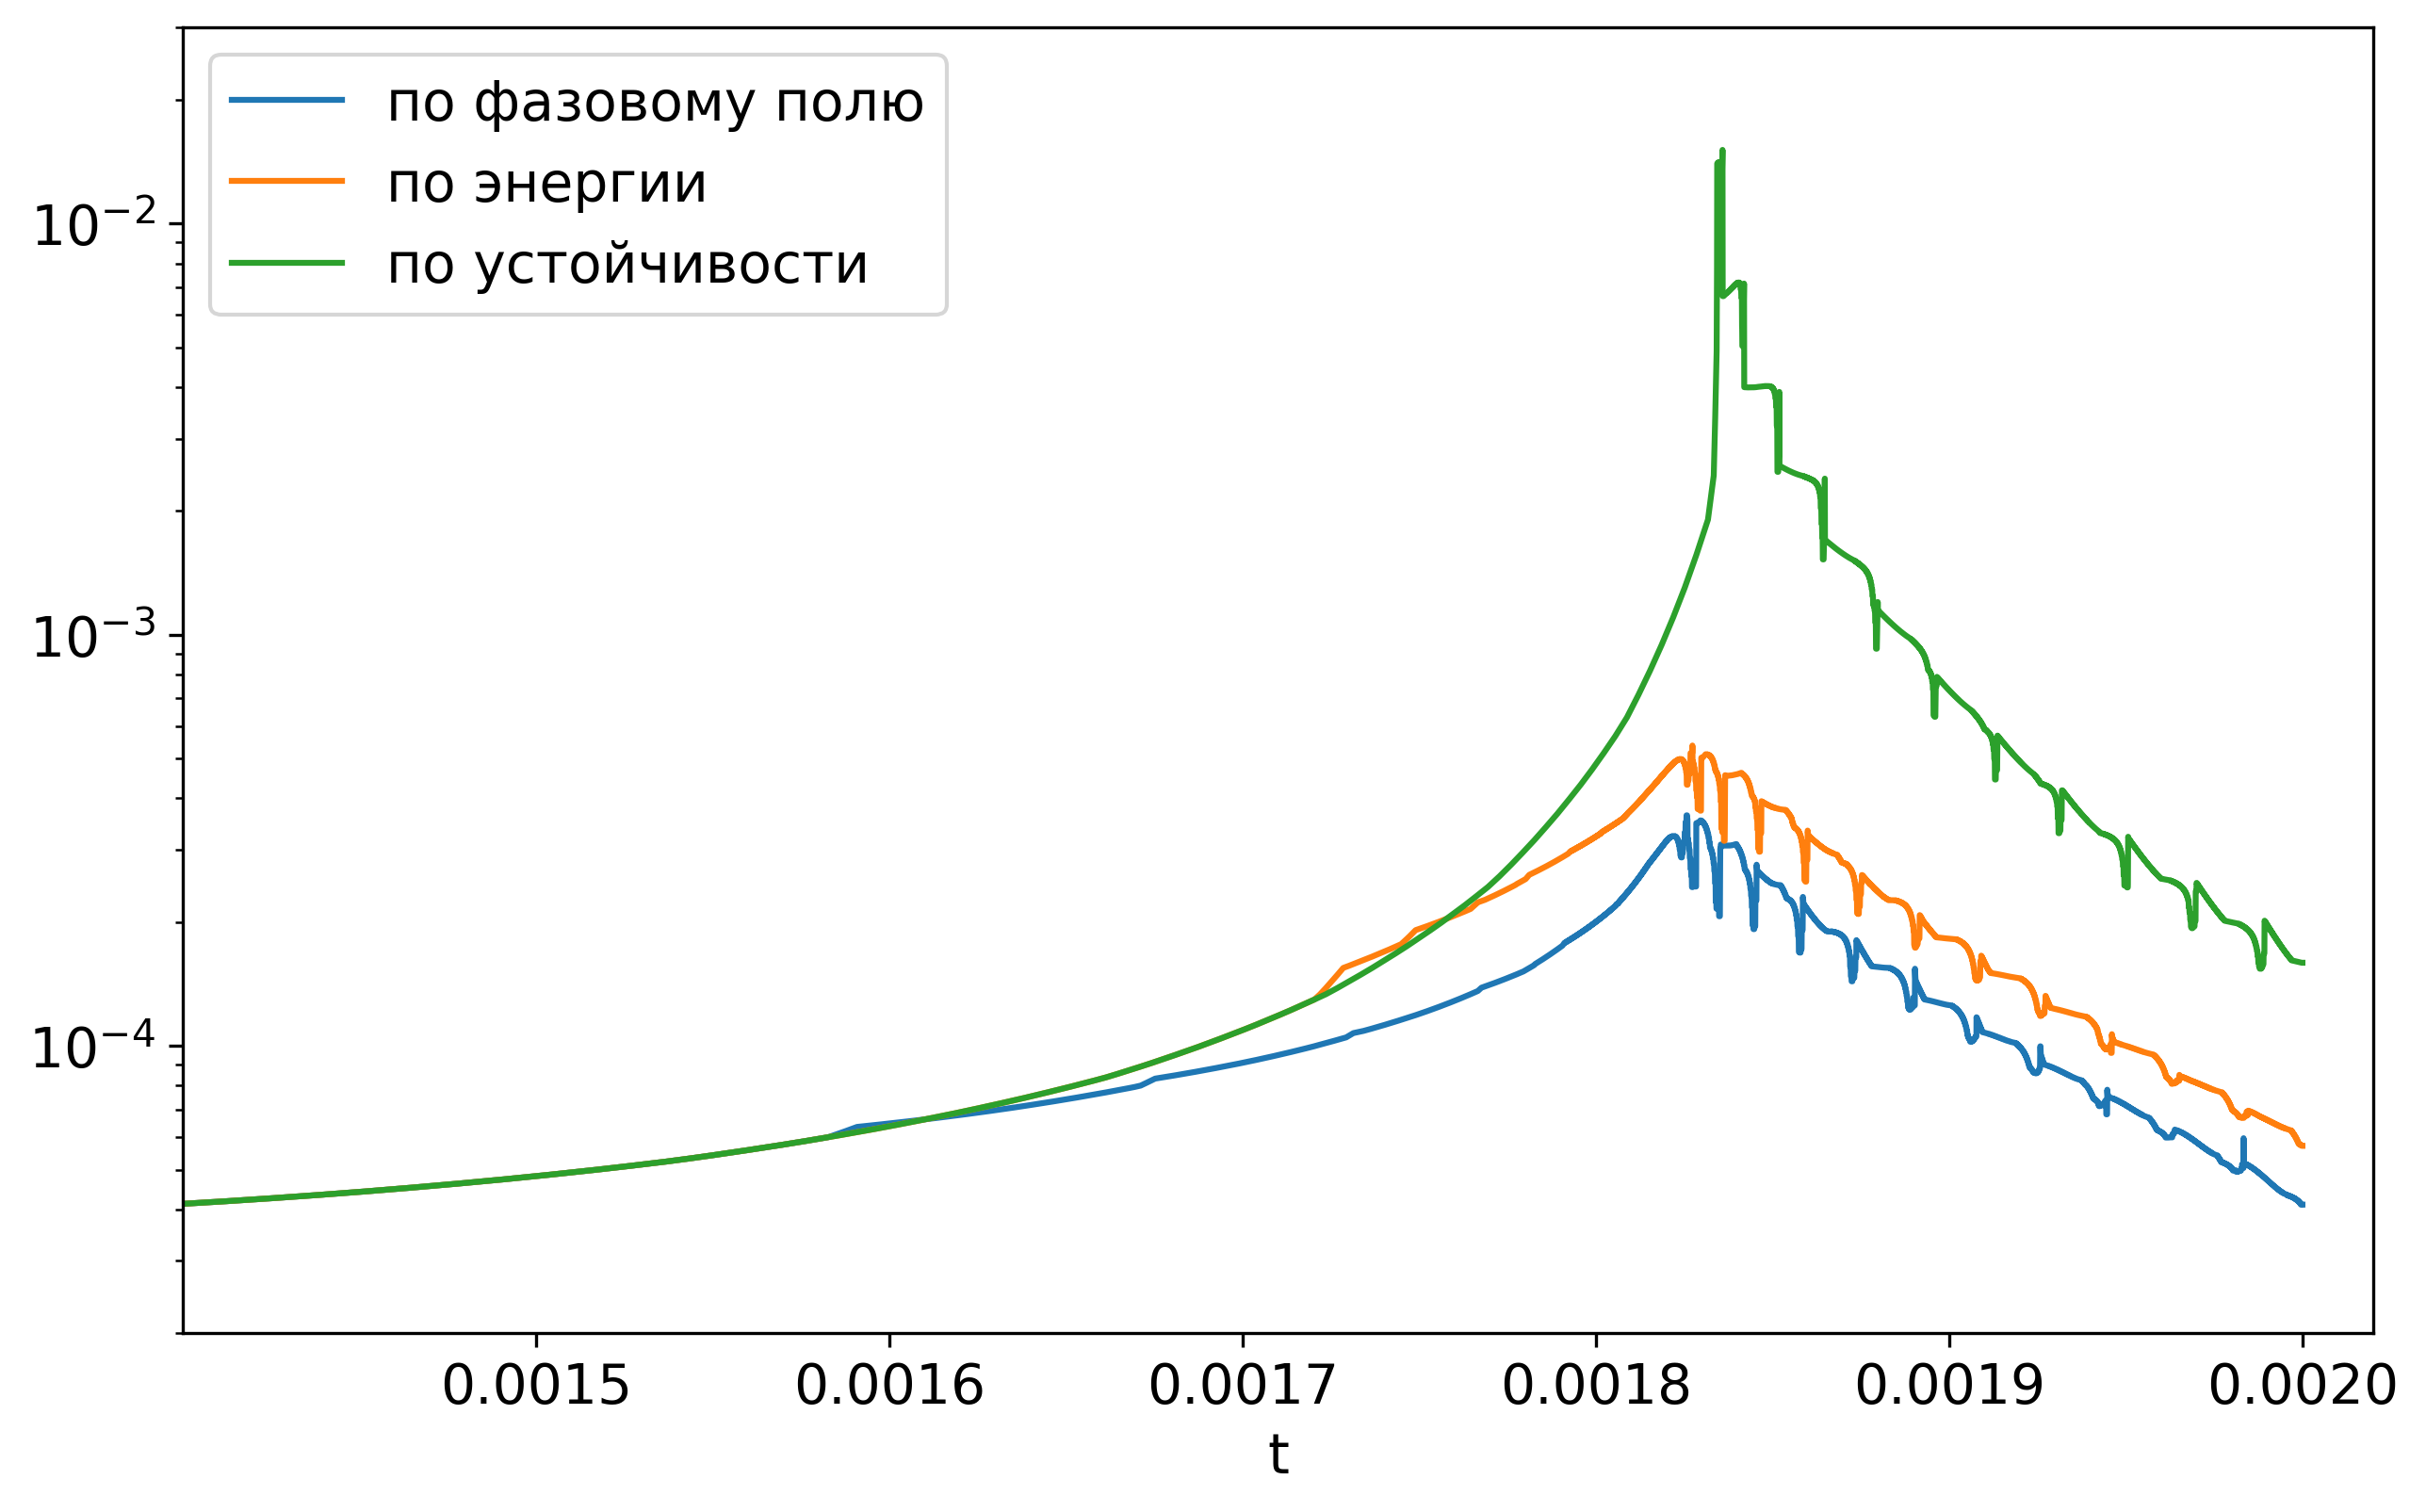

In [16]:
plt.figure(figsize=(10, 6), dpi=300)
plt.xlim([1.4e-3, 2.02e-3])
plt.ylim([2e-5, 3e-2])
plt.xlabel('t')
plt.yscale('log')
plt.xticks([1.5e-3, 1.6e-3, 1.7e-3, 1.8e-3, 1.9e-3, 2e-3])
k = 5
plt.plot(model_ad_phi.ts, window_min(metric_ad_phi, k))
plt.plot(model_ad_energy.ts, window_min(metric_ad_energy, k))
plt.plot(model_ad_stability.ts, window_min(metric_ad_stability, k))
plt.legend(['по фазовому полю', 'по энергии', 'по устойчивости'])
plt.show()

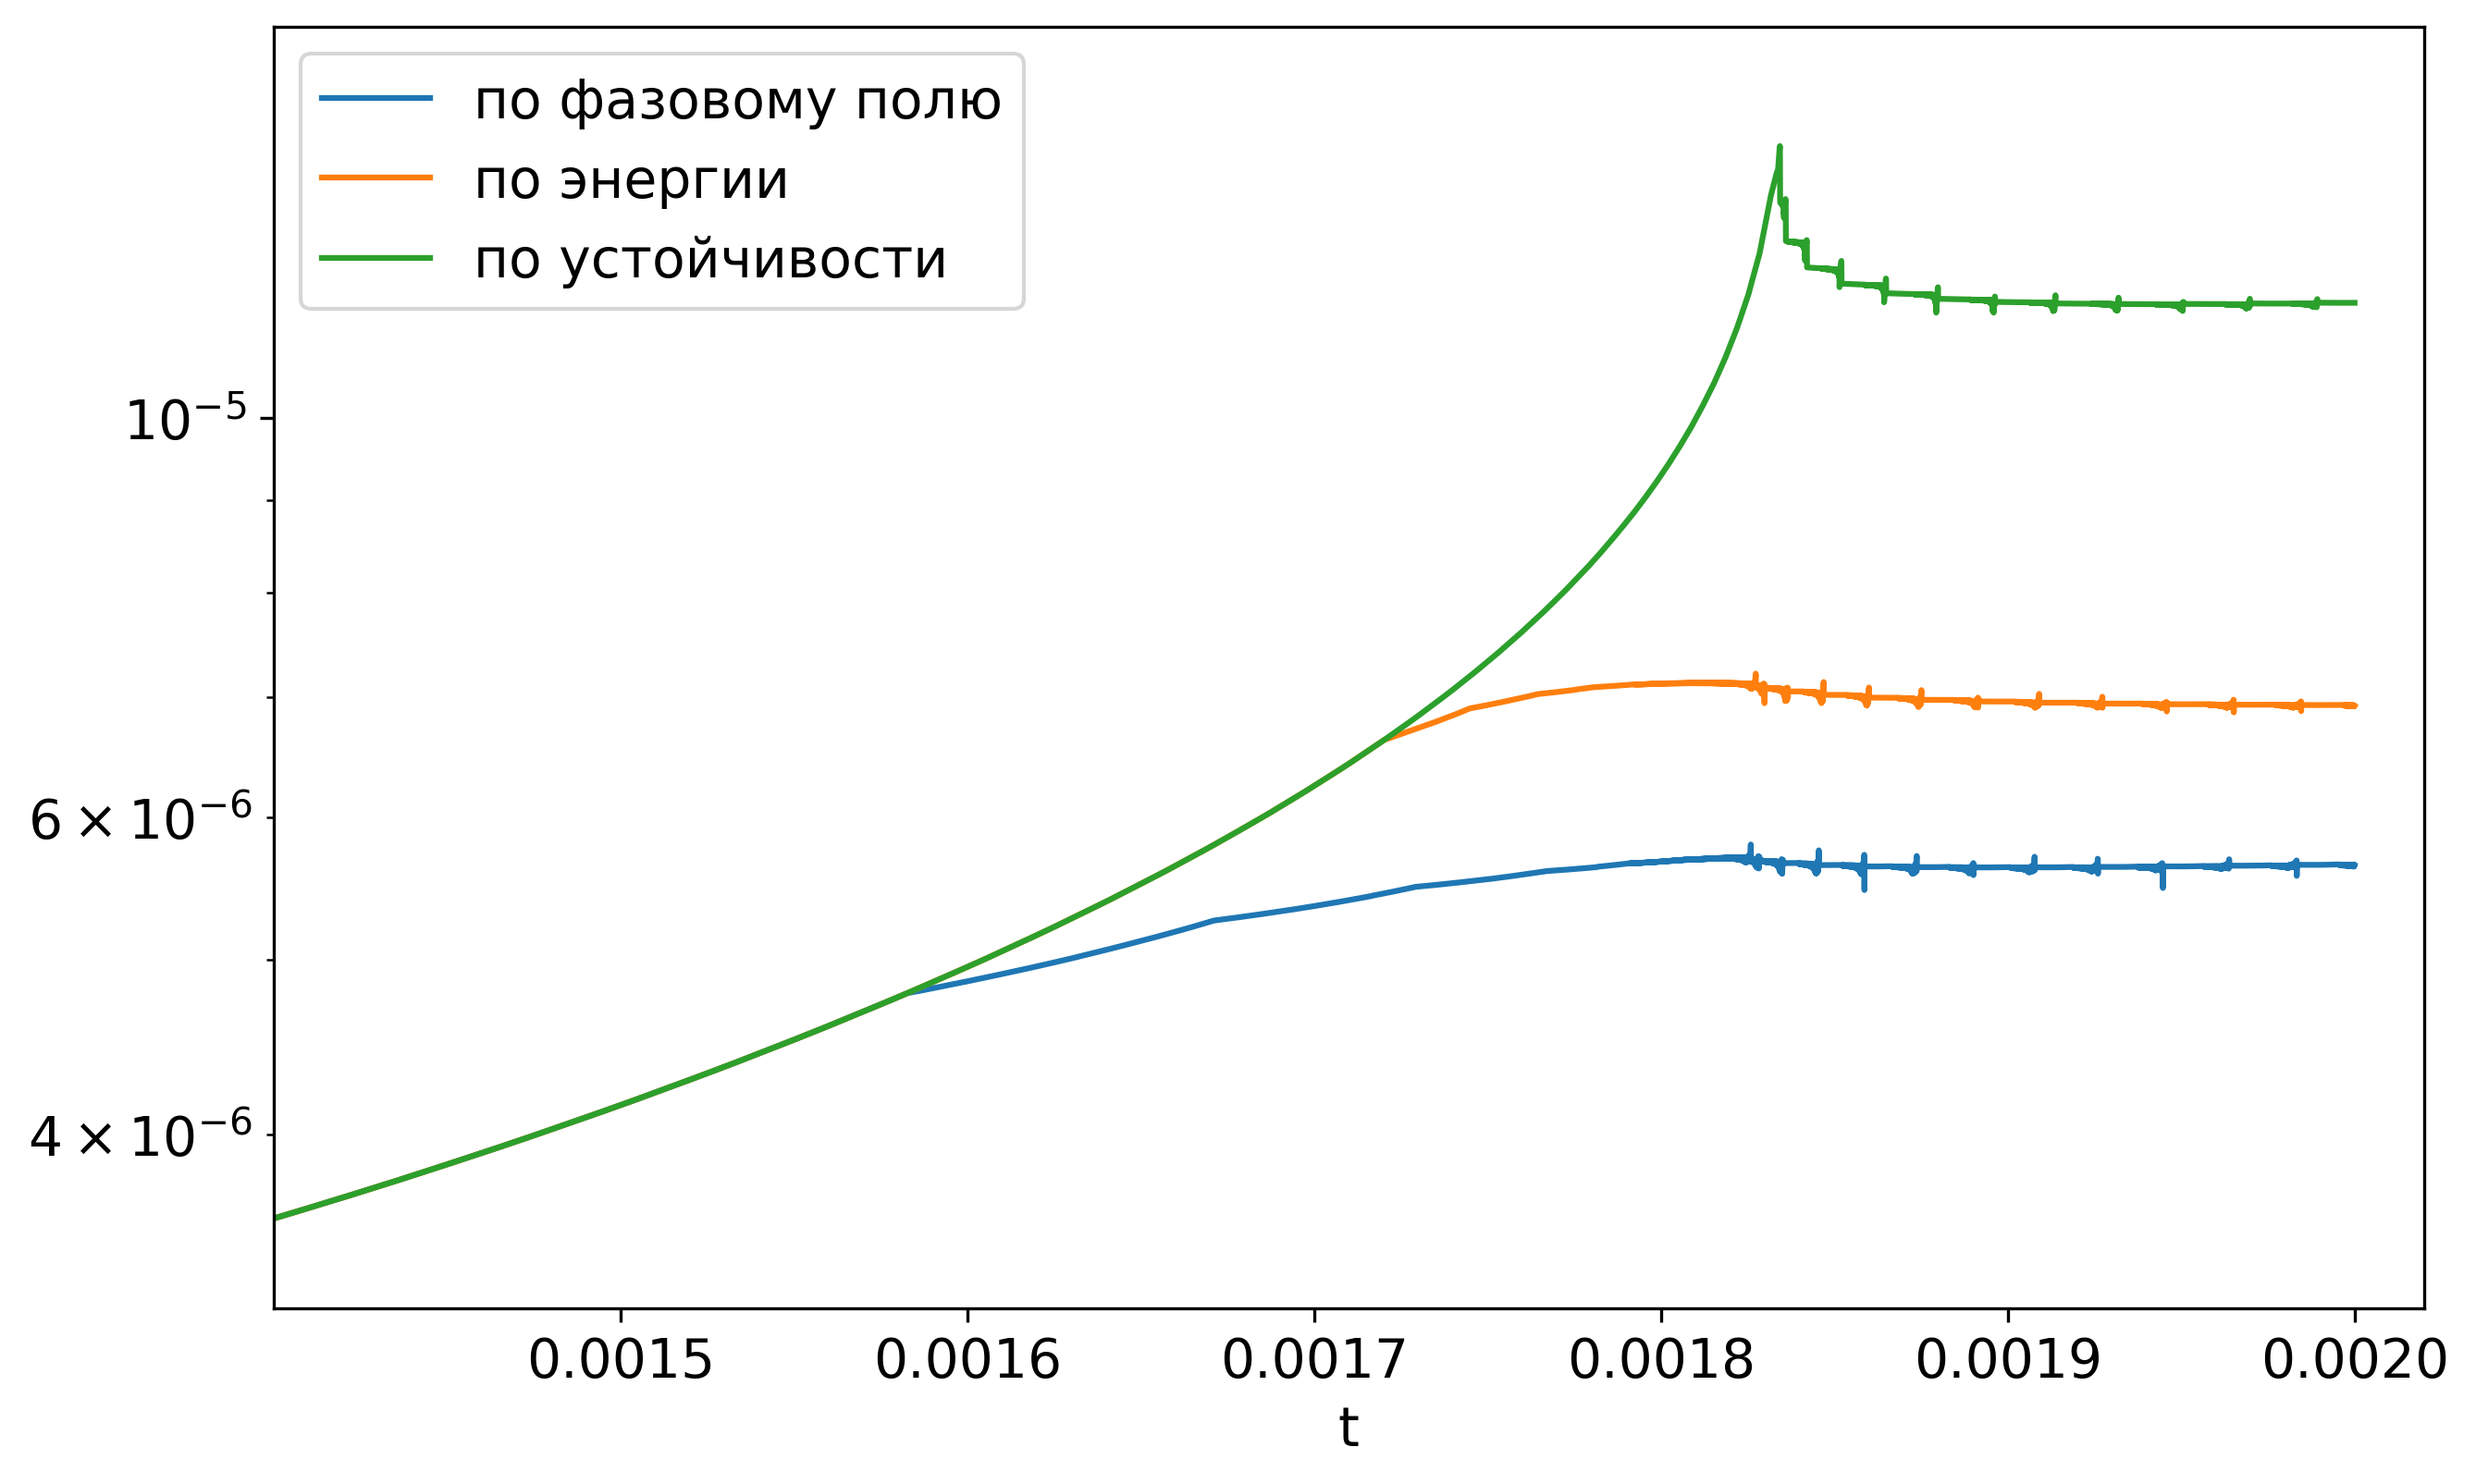

In [17]:
plt.figure(figsize=(10, 6), dpi=300)
plt.xlim([1.4e-3, 2.02e-3])
plt.ylim([3.2e-6, 1.65e-5])
plt.xlabel('t')
plt.yscale('log')
plt.xticks([1.5e-3, 1.6e-3, 1.7e-3, 1.8e-3, 1.9e-3, 2e-3])
plt.plot(model_ad_phi.ts, np.abs(t_shift_ad_phi))
plt.plot(model_ad_energy.ts, np.abs(t_shift_ad_energy))
plt.plot(model_ad_stability.ts, np.abs(t_shift_ad_stability))
plt.legend(['по фазовому полю', 'по энергии', 'по устойчивости'])
plt.show()